<a href="https://colab.research.google.com/github/maxashoka3/Transport-Demand-Prediction/blob/main/Transport_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Transport Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Ashokanand Chaudhary -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your [GitHub](https://github.com/maxashoka3/Transport-Demand-Prediction/blob/main/Transport_Demand_Prediction.ipynb)Link here.

# **Problem Statement**


This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific data and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Vicktoria
The towns from which these routes originate are: 
* Awendo
* Homo Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the firs stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic. The three stops that all these routes make in Nairobi (in order) are:
1. Kawangware: The first stop in the outskirts of Nairobi
2. Westlands
3. Afya Central: The main bus terminal where most passengers disembark
Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final diestination in Nairobi wherever that may be an indication for people's movement patterns, reflecting business hours, cultural events, political events, and holidays.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip '/content/drive/MyDrive/AlmaBetter/Transport Demand Prediction/Nairobi Transport Data.zip'

Archive:  /content/drive/MyDrive/AlmaBetter/Transport Demand Prediction/Nairobi Transport Data.zip
  inflating: train_revised.csv       


In [4]:
# Load Dataseting from the local

nir_df = pd.read_csv("/content/train_revised.csv")

### Dataset First View

In [5]:
# Dataset First Look
nir_df.head()


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f"The number of rows in the Transport Demand Dataset is {nir_df.shape[0]}")

print(f"The number of columns in the Transport Demand Dataset is {nir_df.shape[1]}")

The number of rows in the Transport Demand Dataset is 51645
The number of columns in the Transport Demand Dataset is 10


### Dataset Information

In [7]:
# Dataset Info
nir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
nir_df.duplicated().any()

False

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(nir_df.isna().sum())

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64


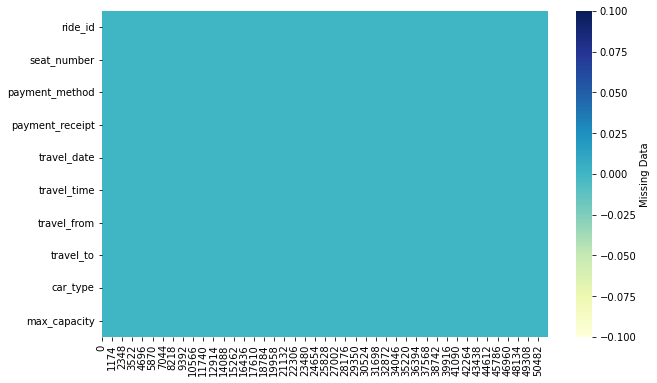

In [10]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.heatmap(nir_df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

### What did you know about your dataset?

This is the open source data base called Nairobi Transport Dataset.It has 51645 rows and 10 columns.All the columns are object type except the max_capacity. 
This dataset does not have any duplicate value or any missing values.

Its 10 columns are :
* ride_id: Unique ID of a vehicle on a specific route

* seat_number: Seat assigned to ticket

* payment_method: Method used by customer to purchase ticket from Monitticket (cash or Mpesa)

* payment_receipt: Unique id number for ticket purchased from Mobiticket

* travel_date: Date of ride departure. (MM/DD/YYYY)

* travel_from: Town from which ride originated

* travel_to: Destination of ride. All rides are to Nairobi

* car_type: Vehicle type (shuttle or bus)

* max_capacity: Number of seats on the vehicle

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
nir_df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [12]:
# Dataset Describe 
nir_df.describe(include='object')


,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [13]:
nir_df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [14]:
# Check Unique Values for each variable.
list_col = nir_df.columns.tolist()
for col in list_col:
  unique_list = nir_df[col].unique().tolist()
  print(f"The unique values of {col}  are : \n\n  {unique_list} \n\n")
  

The unique values of ride_id  are : 

  [1442, 5437, 5710, 5777, 5778, 5781, 5784, 5789, 5790, 5791, 5792, 5793, 5794, 5795, 5796, 5797, 5798, 5800, 5801, 5802, 5803, 5804, 5808, 5809, 5810, 5811, 5812, 5816, 5817, 5822, 5823, 5824, 5825, 5826, 5830, 5834, 5835, 5836, 5837, 5838, 5839, 5840, 5844, 5845, 5849, 5850, 5851, 5852, 5853, 5856, 5857, 5858, 5861, 5862, 5863, 5864, 5867, 5868, 5873, 5874, 5875, 5876, 5878, 5880, 5881, 5882, 5886, 5887, 5888, 5889, 5890, 5894, 5897, 5898, 5899, 5901, 5902, 5910, 5918, 5919, 5920, 5921, 5922, 5923, 5924, 5925, 5928, 5929, 5931, 5933, 5940, 5941, 5942, 5943, 5944, 5945, 5946, 5947, 5950, 5951, 5953, 5957, 5958, 5937, 5959, 5960, 5961, 5964, 5965, 5969, 5971, 5972, 5973, 5976, 5982, 5983, 5984, 5985, 5986, 5988, 5993, 5994, 5995, 5996, 5997, 5998, 6000, 6003, 6008, 6009, 6010, 6013, 6015, 6019, 6020, 6021, 6022, 6029, 6030, 6031, 6032, 6037, 6038, 6039, 6040, 6041, 6042, 6045, 6049, 6050, 6051, 6055, 6058, 6059, 6060, 6065, 6066, 6067, 6068, 6069,

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
# first copy the original dataset
df = nir_df.copy()


Since we does not have the the target variable. First we need to find the target variable. It can be found by the count of each ride_id that will be the our target variable.

In [16]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [17]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [18]:
target_df = df.groupby(['ride_id']).seat_number.count().rename("number_of_ticket").reset_index()

In [19]:
target_df.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


In [20]:
df.shape

(51645, 10)

In [21]:
# merging target_df to df
df = df.merge(target_df, how = 'left',on = 'ride_id').reset_index()

In [22]:
df.head()

,index,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             51645 non-null  int64 
 1   ride_id           51645 non-null  int64 
 2   seat_number       51645 non-null  object
 3   payment_method    51645 non-null  object
 4   payment_receipt   51645 non-null  object
 5   travel_date       51645 non-null  object
 6   travel_time       51645 non-null  object
 7   travel_from       51645 non-null  object
 8   travel_to         51645 non-null  object
 9   car_type          51645 non-null  object
 10  max_capacity      51645 non-null  int64 
 11  number_of_ticket  51645 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 4.7+ MB


In [24]:
# changing the travel_data to the 
df["travel_date"] = pd.to_datetime(df["travel_date"],infer_datetime_format=True)
# Getting the year
df['Year'] = df.travel_date.dt.year

# Getting the name of the Month
df['Month_Name'] = df['travel_date'].dt.month_name()
# Getting the day of the Day
df['Day'] = df.travel_date.dt.day
# Getting the name of the day
df['day_of_week'] = df['travel_date'].dt.day_name()

# Getting the hour
df['hour'] = df.travel_time.map(lambda x: pd.to_datetime(x).hour)

In [25]:
df['Month_Name'].unique()

array(['October', 'November', 'April', 'December', 'September', 'August',
       'July', 'June', 'May', 'March', 'February', 'January'],
      dtype=object)

In [26]:
# Function for defining the season 
def season(mon):
  if mon in ['March','April','May']:
    return 'Heavy Rainy'
  elif mon in ['October','November']:
    return 'Short Rainy'
  elif mon in ['December','January','February']:
    return 'Hot Dry'
  else:
    return 'Cool Dry'


In [27]:
# creating the new column which will store the season
df['Season'] = df['Month_Name'].apply(lambda x: season(x))

In [28]:
# Checking if the function worked...
df[['Season','Month_Name']].sample(10)

,Season,Month_Name
23464,Hot Dry,December
18635,Hot Dry,January
25313,Heavy Rainy,April
37183,Cool Dry,August
16973,Hot Dry,January
40388,Heavy Rainy,March
891,Heavy Rainy,March
18662,Hot Dry,January
7344,Hot Dry,February
19052,Hot Dry,January


**The above season columns is created on the basis of the this** [Article](https://www.tripsavvy.com/kenya-weather-and-average-temperatures-4071455) **which explains the climate of Nairobi**

In [29]:
'''# Use datetime.to_period() method to extract month and year
df['Month_Year'] = df['travel_date'].dt.to_period('M')
df['Month'] = df['travel_date'].dt.strftime('%m')
df['Month'] = df['Month'].apply(lambda x : int(x))
df['Name_Month'] = df["Month"].apply(lambda x:calendar.month_abbr[x])
'''

'# Use datetime.to_period() method to extract month and year\ndf[\'Month_Year\'] = df[\'travel_date\'].dt.to_period(\'M\')\ndf[\'Month\'] = df[\'travel_date\'].dt.strftime(\'%m\')\ndf[\'Month\'] = df[\'Month\'].apply(lambda x : int(x))\ndf[\'Name_Month\'] = df["Month"].apply(lambda x:calendar.month_abbr[x])\n'

In [30]:
# which year has done most number of transactions
total_of_year = df.groupby('Year').agg({"Year":'count'})
total_of_year.rename(columns={'Year': 'Total'}, inplace = True)
total_of_year.reset_index(inplace = True)
total_of_year

,Year,Total
0,2017,13700
1,2018,37945


In [31]:
# Total ticket sold in perticular year
ticket_sold_per_year = df.groupby('Year').agg({'number_of_ticket':'sum'})
ticket_sold_per_year.rename(columns = {'number_of_ticket':'Ticket Sold'},inplace = True)
ticket_sold_per_year.reset_index(inplace = True)
ticket_sold_per_year

,Year,Ticket Sold
0,2017,215600
1,2018,676873


In [32]:
# Total ticket sold in perticular year
ticket_sold_per_year_per_city = df.groupby(['travel_from','Year']).agg({'number_of_ticket':'sum'}).unstack().reset_index()
ticket_sold_per_year_per_city.rename(columns = {'number_of_ticket':'Ticket Sold'},inplace = True)
ticket_sold_per_year_per_city = ticket_sold_per_year_per_city.set_index('travel_from')
ticket_sold_per_year_per_city

Ticket Sold          
Year               2017      2018
travel_from                      
Awendo              4.0   30926.0
Homa Bay        33990.0  130118.0
Kehancha            NaN   28745.0
Kendu Bay           NaN       1.0
Keroka           5101.0    1349.0
Keumbu             24.0       2.0
Kijauri           827.0    2426.0
Kisii          104046.0  143655.0
Mbita               NaN    9426.0
Migori          61633.0  130734.0
Ndhiwa              NaN    2654.0
Nyachenge           NaN    2080.0
Oyugis             17.0       NaN
Rodi                NaN    3791.0
Rongo            9958.0   32790.0
Sirare              NaN  157889.0
Sori                NaN     287.0

In [33]:
# Top month
Top_mon = df.groupby('Month_Name').agg({'Month_Name':'count'})
Top_mon.rename(columns = {"Month_Name": "Count"},inplace = True)
Top_mon.reset_index(inplace = True)

In [34]:
# Ticket sold per month of different Cities
ticket_sold_per_mon = df.groupby('Month_Name').agg({'number_of_ticket':'sum'})
ticket_sold_per_mon.rename(columns = {'number_of_ticket':'Ticket Sold'},inplace = True)
ticket_sold_per_mon.reset_index(inplace = True)
ticket_sold_per_mon

,Month_Name,Ticket Sold
0,April,98008
1,August,40026
2,December,166954
3,February,130909
4,January,115162
5,July,37222
6,June,33705
7,March,119743
8,May,30400
9,November,47741


In [35]:

Month_per_payment_method_df=df.groupby(['Month_Name','payment_method']).agg({"payment_method" : "count"}).unstack().reset_index()

Month_per_payment_method_df= Month_per_payment_method_df.set_index('Month_Name')
Month_per_payment_method_df

payment_method        
payment_method           Cash   Mpesa
Month_Name                           
April                    17.0  5069.0
August                   10.0  2200.0
December                  8.0  9508.0
February                  4.0  8207.0
January                   1.0  7277.0
July                      NaN  2150.0
June                      3.0  1950.0
March                    44.0  6053.0
May                       NaN  1810.0
November                  6.0  3083.0
October                  12.0  2008.0
September                 8.0  2217.0

In [36]:
# state of the day
def state_time(h):
  if h >= 6 and h < 12:
    return 'Morning'
  elif h>= 12 and h < 15:
    return 'Afternoon'
  elif h>= 15 and h < 19:
    return 'Evening'
  elif h >= 19 and h< 24:
    return 'Night'
  else:
    return 'Early-Morning'

In [37]:
df.hour.unique()

array([ 7,  5,  9,  6, 10,  8, 19, 11, 23])

In [38]:
# Calculation of time period based on the travel_date_and_time feature
df['travel_time_of_day'] = df.hour.apply(state_time)

In [39]:
#grouping by the travel time of the day
total_travel_time_of_day = df.groupby('travel_time_of_day').agg({'travel_time_of_day':'count'})
# renaming the column
total_travel_time_of_day.rename(columns={'travel_time_of_day':'Total Travel'},inplace = True)
# reseting index
total_travel_time_of_day.reset_index(inplace = True)
total_travel_time_of_day

,travel_time_of_day,Total Travel
0,Early-Morning,1515
1,Morning,45269
2,Night,4861


In [40]:
ticket_sold_day_time = df.groupby("travel_time_of_day").agg({"number_of_ticket":'sum'})
ticket_sold_day_time.rename(columns = {"number_of_ticket":"Total Ticket Sold"},inplace = True)
ticket_sold_day_time.reset_index(inplace = True)
ticket_sold_day_time

,travel_time_of_day,Total Ticket Sold
0,Early-Morning,10623
1,Morning,726533
2,Night,155317


In [41]:
# Most busiest day
Most_busy_day = df.groupby("day_of_week").agg({"day_of_week":'count'})
Most_busy_day.rename(columns = {"day_of_week":'Week',"day_of_week":"count"},inplace= True)
Most_busy_day.reset_index(inplace = True)
Most_busy_day.sort_values(by = 'count',ascending=False,inplace = True)
Most_busy_day

,day_of_week,count
6,Wednesday,8257
5,Tuesday,7994
4,Thursday,7795
0,Friday,7477
1,Monday,6932
3,Sunday,6847
2,Saturday,6343


In [42]:
# Total number of ticket Sold per Day
ticket_per_day = df.groupby("day_of_week").agg({"number_of_ticket":'sum'})
ticket_per_day.rename(columns = {'day_of_week': 'Day',"number_of_ticket":"Total Ticket Sold"},inplace = True)
ticket_per_day.reset_index(inplace = True)
ticket_per_day

,day_of_week,Total Ticket Sold
0,Friday,127259
1,Monday,118110
2,Saturday,115097
3,Sunday,121185
4,Thursday,128013
5,Tuesday,137120
6,Wednesday,145689


In [43]:
# ticket sold in weekend vs rest of the day
weekend_df = df[(df['day_of_week'] == 'Sunday') | (df['day_of_week'] == 'Saturday')]
rest_df = df[(df['day_of_week'] != 'Sunday') & (df['day_of_week'] != 'Saturday')]


In [44]:
# total ticket sold in weekend
ticket_sold = weekend_df["number_of_ticket"].sum()
print(f"Total number of ticket sold in Weekend(i.e Saturday & Sunday) is {ticket_sold}")

Total number of ticket sold in Weekend(i.e Saturday & Sunday) is 236282


In [45]:
# total ticket sold in rest of day
ticket_sold = rest_df["number_of_ticket"].sum()
print(f"Total number of ticket sold in Except Weekend(i.e Saturday & Sunday) is {ticket_sold}")

Total number of ticket sold in Except Weekend(i.e Saturday & Sunday) is 656191


In [46]:
# Findind most popular day for travel
most_popular_day_per_month_df = df.groupby('Month_Name')['Day'].first().reset_index()
most_popular_day_per_month_df.sort_values(by = 'Day',ascending = False,inplace = True)
most_popular_day_per_month_df.rename(columns= {'Day':'Popular Day'},inplace = True)
most_popular_day_per_month_df

,Month_Name,Popular Day
0,April,20
9,November,19
10,October,17
1,August,4
2,December,4
3,February,4
4,January,4
5,July,4
6,June,4
7,March,4


In [47]:
travel_per_season = df.groupby('Season').agg({'number_of_ticket':'sum'}).reset_index()
travel_per_season.rename(columns= {'number_of_ticket':'Total Traveller'},inplace = True)
travel_per_season.sort_values(by= 'Total Traveller',inplace = True)
travel_per_season

,Season,Total Traveller
3,Short Rainy,82581
0,Cool Dry,148716
1,Heavy Rainy,248151
2,Hot Dry,413025


In [48]:
print(f"Total number of Traveller to Nairobi is {travel_per_season['Total Traveller'].sum()}")

Total number of Traveller to Nairobi is 892473


In [49]:
df.columns

Index(['index', 'ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity', 'number_of_ticket', 'Year', 'Month_Name', 'Day',
       'day_of_week', 'hour', 'Season', 'travel_time_of_day'],
      dtype='object')

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Ticket Sold Per Month

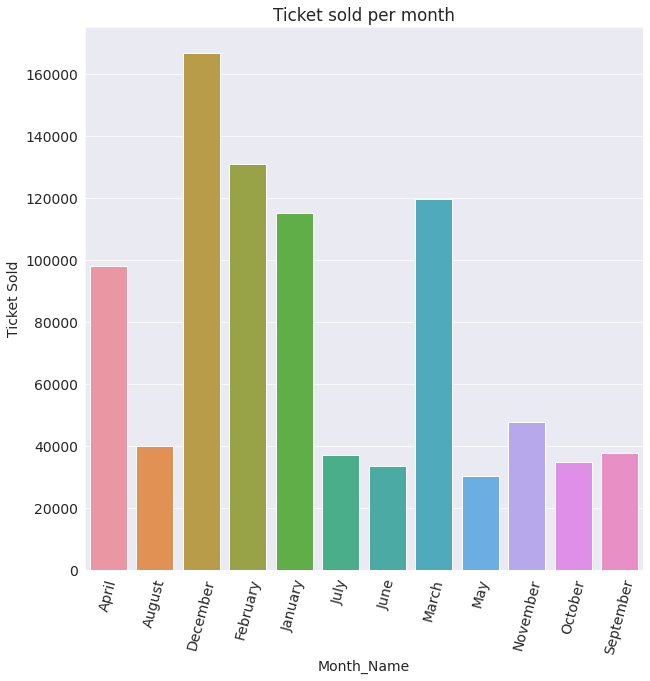

In [50]:
# Chart - 1 visualization code

plt.rcParams['figure.figsize'] = (10,10)
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
sns.barplot(data = ticket_sold_per_mon, x = 'Month_Name', y = 'Ticket Sold')
# title
plt.title("Ticket sold per month")
plt.xticks(rotation = 75)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is a statistical approach to represent given data using vertical and horizontal rectangular bars. The length of each bar is proportional to the value they represent. It is basically a graphical representation of data with the help of horizontal or vertical bars with different heights.

##### 2. What is/are the insight(s) found from the chart?

Insight:
* December has the highest number of ticket sale
* May has the lowest number of ticket sale

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It represents that Government should focus in the december as it can cause more traffic jam as it has the highest number of ticket sales. And should invest less in the May month. This can help in proper utilization of the resources.

#### Chart - 2 Ticket sold per Year

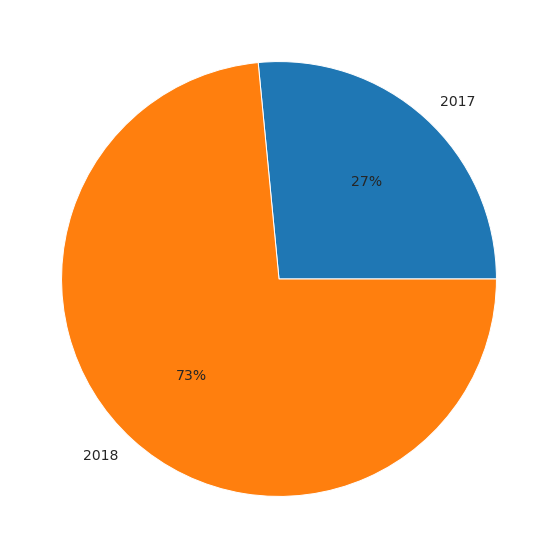

In [51]:
# Chart - 2 visualization code
plt.pie(total_of_year.Total,labels = total_of_year.Year, autopct = "%.0f%%")

plt.show()

##### 1. Why did you pick the specific chart?

A pie chart shows how a total amount is divided between levels of a categorical variable as cirlce divided into radial slices. Each categorical value corresponds with a single slice of the circle, and the size of each slice (both in area and arc length) indicates what proportion of the whole each category level takes. Here pie chart depicts the distribution of the number of ticket sold in perticular year.

##### 2. What is/are the insight(s) found from the chart?

Insight:
* 73 % of ticket is sold in 2018
* There is rise of 46% of ticket sales in Nairobi from 2017 to 2018 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It tells that there is too much rise of the ticket sales so govenment should be prepared for raise in  traffic in the city and security of these rise people.

#### Chart - 3 Distribution of Ticket per cities

In [52]:
ticket_sold_per_year_per_city

Ticket Sold          
Year               2017      2018
travel_from                      
Awendo              4.0   30926.0
Homa Bay        33990.0  130118.0
Kehancha            NaN   28745.0
Kendu Bay           NaN       1.0
Keroka           5101.0    1349.0
Keumbu             24.0       2.0
Kijauri           827.0    2426.0
Kisii          104046.0  143655.0
Mbita               NaN    9426.0
Migori          61633.0  130734.0
Ndhiwa              NaN    2654.0
Nyachenge           NaN    2080.0
Oyugis             17.0       NaN
Rodi                NaN    3791.0
Rongo            9958.0   32790.0
Sirare              NaN  157889.0
Sori                NaN     287.0

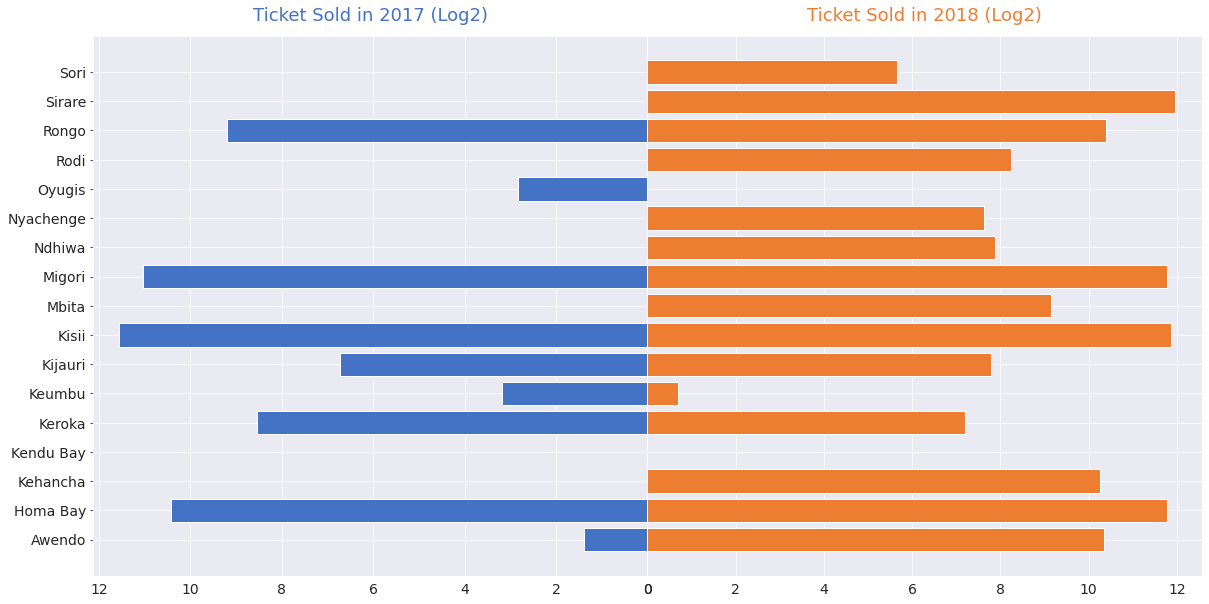

In [53]:
## Chart - 3 visualization code of ticket_sold_per_year_per_city
# getting the index
ind = ticket_sold_per_year_per_city.index
# column value of the paid
col_0 = np.log(ticket_sold_per_year_per_city['Ticket Sold'][2017])
# column value of the free
col_1 = np.log(ticket_sold_per_year_per_city['Ticket Sold'][2018])

title_0 = 'Ticket Sold in 2017 (Log2)'
title_1 = 'Ticket Sold in 2018 (Log2)'

# Setting up the subplots i.e with 2 columns
fig, axes = plt.subplots(figsize=(20,10), ncols=2, sharey=True)
# set tight layout 
fig.tight_layout()

# visulaization of bar graph horizontally with paid type
axes[0].barh(ind, col_0, align='center', color='#4472c4', zorder=10)
# setting up the Title of free type
axes[0].set_title(title_0, fontsize=18, pad=15, color='#4472c4')

# visualaization of the bar graph horizontally with the free types
axes[1].barh(ind, col_1, align='center', color='#ed7d31', zorder=10)

# setting p the tilte of  paid type
axes[1].set_title(title_1, fontsize=18, pad=15, color='#ed7d31')
    
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 


axes[0].set(yticks=ind, yticklabels=ind)
axes[0].yaxis.tick_left()

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

##### 1. Why did you pick the specific chart?

As a bar chart is a statistical approach to representing given data using vertical and horizontal rectangular bars. The length of each bar is proportional to the value they represent. It is a graphical representation of data with the help of horizontal or vertical bars with different heights. 

We have used the multiple horizontal bar graph with inverted axes in the subplot because it gives the power to compare the two elements simultaneously with the third in hue. So that we can get insight from multiple variables at once.
 
 

 



##### 2. What is/are the insight(s) found from the chart?

Insights:
* kisii has the highest number of ticket sales 
* Bus service started from 2018 in Sirare but it has the highest sale till date.
* Kendu Bay has the lowest number of ticket sales.
* Sori, Sirrare, Nyachenge,Rodi, Mbita,Nidhiwa has started their servies from 2018 But **Oyuigis** has stopted their service in 2018.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

They need to focus on the growth of ticket in new areas and should invest less in the areas where ticket sale is less. And focus why this sales is less in those areas. Withdraw their management team from Oyuigis


#### Chart - 4 Distribution of Percentage of Ticket sales per Day

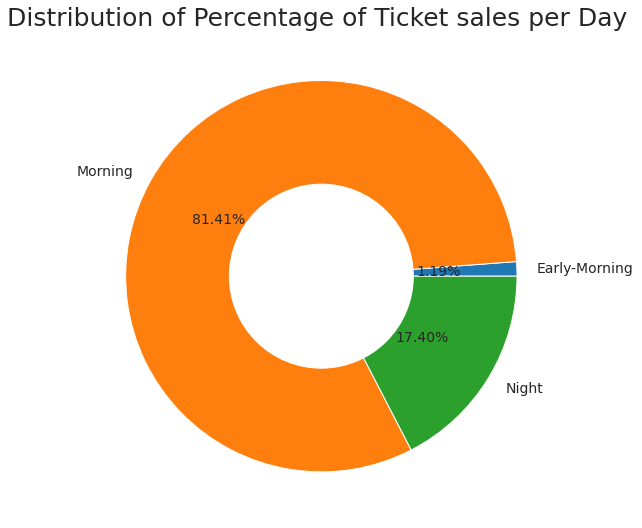

In [54]:
# Chart - 4 visualization code
plt.figure(figsize = (9,9))
# ploting the pie chart
plt.pie(ticket_sold_day_time['Total Ticket Sold'],
        labels=ticket_sold_day_time['travel_time_of_day'],
        autopct='%1.2f%%')
my_circle = plt.Circle( (0,0), 0.47, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Distribution of Percentage of Ticket sales per Day ', fontsize = 25)
plt.show()

##### 1. Why did you pick the specific chart?

Donut charts are the most commonly used charts. They are divided into segments, the arc of each segment shows the proportional value of each piece of data.
This chart is similar to the pie chart.
This chart is excellent at showing the relational proportion between data.

##### 2. What is/are the insight(s) found from the chart?

Insight:
* Most ticket is sold in the Morning time
* Least Ticket is sold in the early morning

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Givenment of Nairobi should focus in handling of traffic in the Morning time as more number of ticket is being sold at morning time.

#### Chart - 5 Ticket sales per day

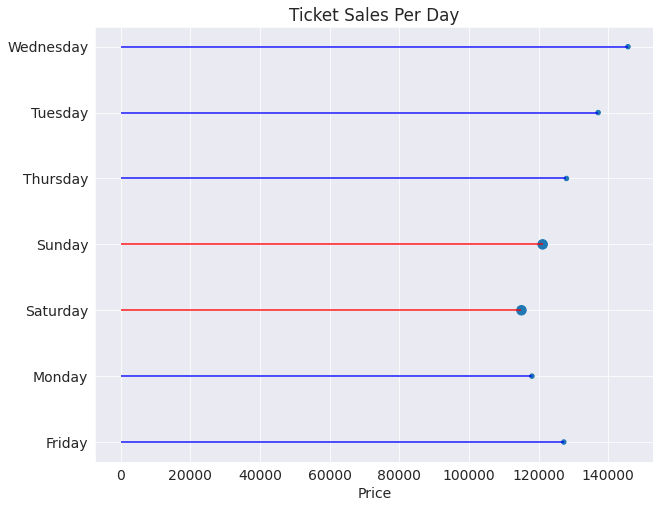

In [55]:
# Chart - 5 visualization code
plt.figure(figsize = (10,8))
# Create a color 
my_color=('blue','blue','red','red','blue','blue')
my_size=(20,20,90,90,20,20,20)
 
# The horizontal plot is made using the hline() function
plt.hlines(y= ticket_per_day['day_of_week'], xmin=0, xmax=ticket_per_day['Total Ticket Sold'],color=my_color, alpha=0.9)
plt.scatter(ticket_per_day['Total Ticket Sold'], ticket_per_day['day_of_week'],s=my_size,alpha=1)

# Add title and axis names
plt.yticks(ticket_per_day['day_of_week'])
plt.title("Ticket Sales Per Day", loc='Center')
plt.xlabel('Price')

# show the graph
plt.show()

##### 1. Why did you pick the specific chart?

A lollipop chart is an alternative to the more usaul barplot.A lollipop plot displays each element of a dataset as a segment and a circle.

##### 2. What is/are the insight(s) found from the chart?

Insight:
* Wednesday has the highest number of Ticket sales.
* Weekend is not great for ticket sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As ticket sales are high at wednesday, it shows the increase in traffic the road of Nairobi so they need to implemnet more traffic police, proper security in the road to Nairobi

#### Chart - 6 Month per Payment Type 

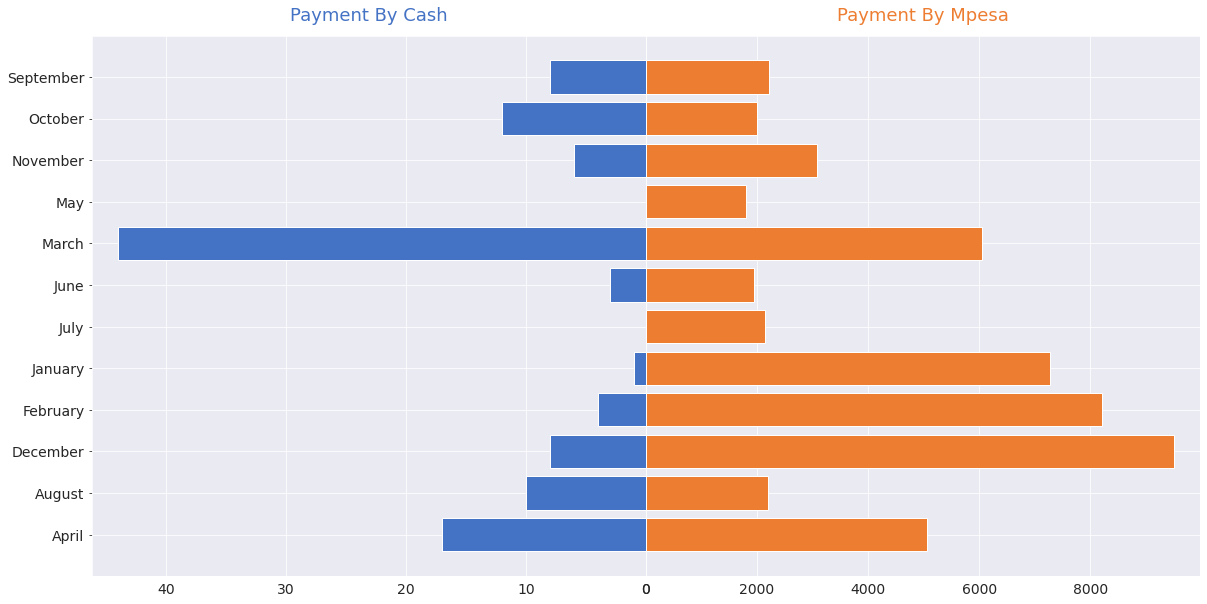

In [56]:
# Chart - 6 visualization code
#Plot between Paid and Free installed app counts
# getting the index
ind = Month_per_payment_method_df.index
# column value of the paid
col_0 = Month_per_payment_method_df['payment_method']['Cash']
# column value of the free
col_1 = Month_per_payment_method_df['payment_method']['Mpesa']

title_0 = 'Payment By Cash'
title_1 = 'Payment By Mpesa'

# Setting up the subplots i.e with 2 columns
fig, axes = plt.subplots(figsize=(20,10), ncols=2, sharey=True)
# set tight layout 
fig.tight_layout()

# visulaization of bar graph horizontally with paid type
axes[0].barh(ind, col_0, align='center', color='#4472c4', zorder=10)

# setting up the Title of free type
axes[0].set_title(title_0, fontsize=18, pad=15, color='#4472c4')

# visualaization of the bar graph horizontally with the free types
axes[1].barh(ind, col_1, align='center', color='#ed7d31', zorder=10)

# setting p the tilte of  paid type
axes[1].set_title(title_1, fontsize=18, pad=15, color='#ed7d31')
    
# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 


axes[0].set(yticks=ind, yticklabels=ind)
axes[0].yaxis.tick_left()

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

##### 1. Why did you pick the specific chart?

We have used the multiple horizontal bar graph with inverted axes in the subplot because it gives the power to compare the two elements simultaneously with the third in hue. So that we can get insight from multiple variables at once.
 
 


##### 2. What is/are the insight(s) found from the chart?

Insight:
* March month is the maximum used for payment method.
* Mpesa is used mostly used in December.
* May and July does not involves the payment of ticket by **Cash**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Mpesa is mostly used to buy ticket. So Govenment should not much worry about the handling of cash instead they can increase more security in the app.

#### Chart - 7 Scatter Plot between the Total Ticket Sales and Hour by Time of Day

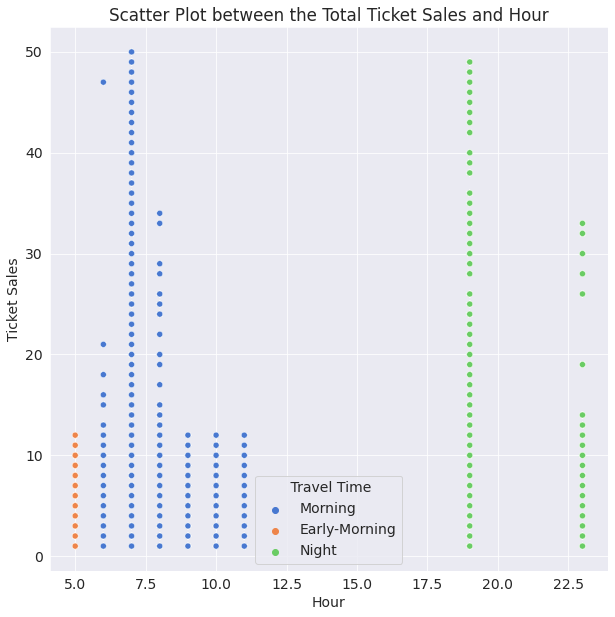

In [57]:
# Chart - 7 visualization code
sns.scatterplot(data = df,x = 'hour',y = 'number_of_ticket',hue = 'travel_time_of_day',palette = "muted")
plt.title("Scatter Plot between the Total Ticket Sales and Hour")
plt.xlabel("Hour")
plt.ylabel("Ticket Sales")
plt.legend( title = " Travel Time")
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots are used to plot data points on a horizontal and a vertical axis in an attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X and Y axes. So Ticket sales and Hours are just plotted to see if there is any relationship.
 



##### 2. What is/are the insight(s) found from the chart?

Insights:
* Most Ticket sales is around 7:30 in the morning and also in evening
* There is no sales of ticket is from 11 to 19 hrs.
* Most sales are down in the Morning time.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

State Govenment should should handle the traffic and resources economically. Means it should implement more in busy hour rather in the less busy hour.

#### Chart - 8 Scatter Plot between the Total Ticket Sales and Hour By Car Type

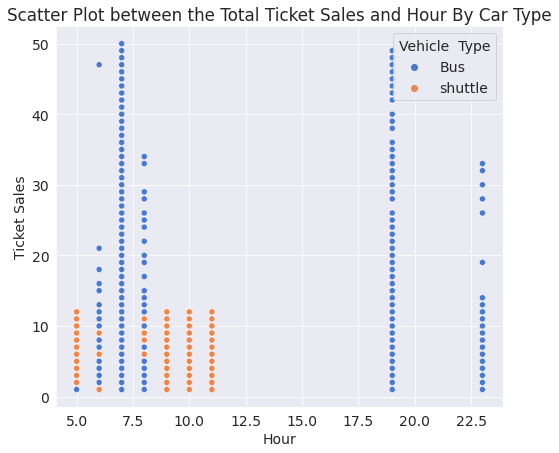

In [58]:
# Chart - 7 visualization code
plt.figure(figsize= (8,7))
sns.scatterplot(data = df,x = 'hour',y = 'number_of_ticket',hue = 'car_type',palette = "muted")
plt.title("Scatter Plot between the Total Ticket Sales and Hour By Car Type")
plt.legend( title = "Vehicle  Type")
plt.xlabel("Hour")
plt.ylabel("Ticket Sales")
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots are used to plot data points on a horizontal and a vertical axis in an attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X and Y axes. So size and review are just plotted to see if there is any relationship.
 



##### 2. What is/are the insight(s) found from the chart?

Insight:
* In evening only Bus are used for travelling
* In morning time both are used for travelling

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It can help us to close the counter for shutter in the evening and also  helps us to utilize the resources in the ticket selling hour only of the perticular bus type.


#### Chart - 9 Boxplot of Payment Method by Number of Ticket

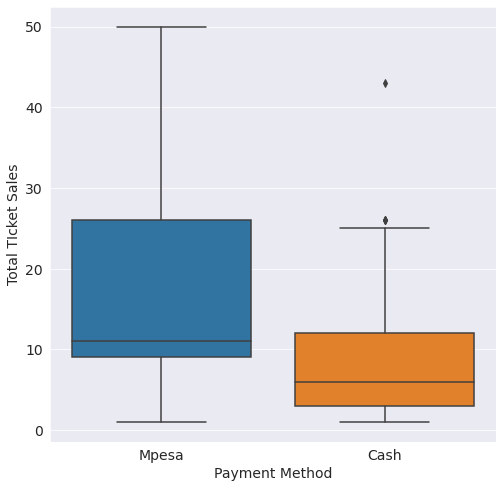

In [59]:
# Chart - 9 visualization code
plt.figure(figsize = (8,8))
sns.boxplot(data = df,
            x ='payment_method',
           y = 'number_of_ticket',)
plt.xlabel("Payment Method")
plt.ylabel("Total TIcket Sales")
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). It can tell you about your outliers and what their values are. Boxplots can also tell you if your data is symmetrical, how tightly your data is grouped and if and how your data is skewed.

##### 2. What is/are the insight(s) found from the chart?

Insights:
* Mpesa has the mean of 11 ticket sales.
* Cash has the mean of 5 ticket sales.
* Cash has the outlier.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

State should improve the mobile security and create the strong firewall for the Mpesa user. They should decrease the cash counter. This saves lots of money and also focus in alternative ways to provide employment.

#### Chart - 10 Violinplot of Vehicle Type

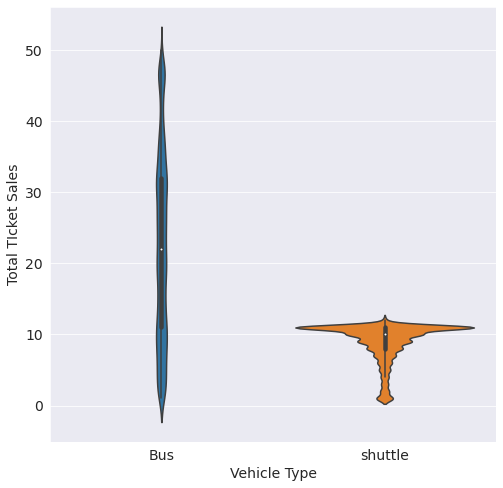

In [60]:
# Chart - 10 visualization code
# Chart - 9 visualization code
plt.figure(figsize = (8,8))

sns.violinplot(data = df,x ='car_type',
           y = 'number_of_ticket',)
plt.xlabel("Vehicle Type")
plt.ylabel("Total TIcket Sales")
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot combines the strengths of a boxplot with those of a histogram, and uses a smoothed probability density function (PDF) rather than a histogram to avoid the subjectivity of binning.
* Violin plots include a boxplot, and identifies the minimum, first quartile, median, third quartile, and maximum in the same way that a boxplot does.
* Violin plots are a great way of visualizing multimodal data.
* Violin plots allow for quick graphical examination and comparison of one or more data sets.

##### 2. What is/are the insight(s) found from the chart?

Insight:
* More people travel by bus than Shuttle


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This shows that most number of people travel by bus so govenment need to build the more strong infracture because heavy vechile can destroy the road easily.

#### Chart - 11 Most popular day To Travel in Every Month

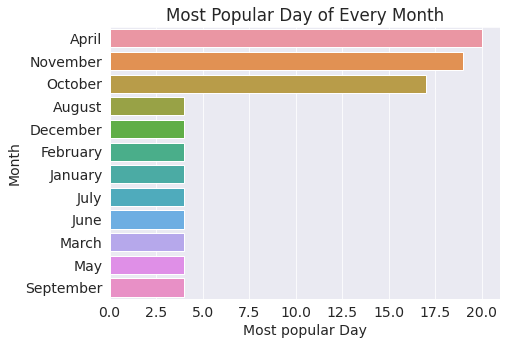

In [61]:
# Chart - 11 visualization code
plt.figure(figsize = (7,5))
sns.barplot(data = most_popular_day_per_month_df,x = most_popular_day_per_month_df['Popular Day'],y = most_popular_day_per_month_df['Month_Name'])
plt.title('Most Popular Day of Every Month')
plt.xlabel('Most popular Day')
plt.ylabel('Month')
plt.show()

##### 1. Why did you pick the specific chart?

As a bar chart is a statistical approach to representing given data using vertical and horizontal rectangular bars. The length of each bar is proportional to the value they represent. It is a graphical representation of data with the help of horizontal or vertical bars with different heights. 
 



##### 2. What is/are the insight(s) found from the chart?

Insight:
* Most popular Day is 4h of every month.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There would be lots of traffic in the 4th of almost every month. So govenment should mark this as the Red Day to travel. 

#### Chart - 12 Relation b/w Subset of Travel Time and Payment Method

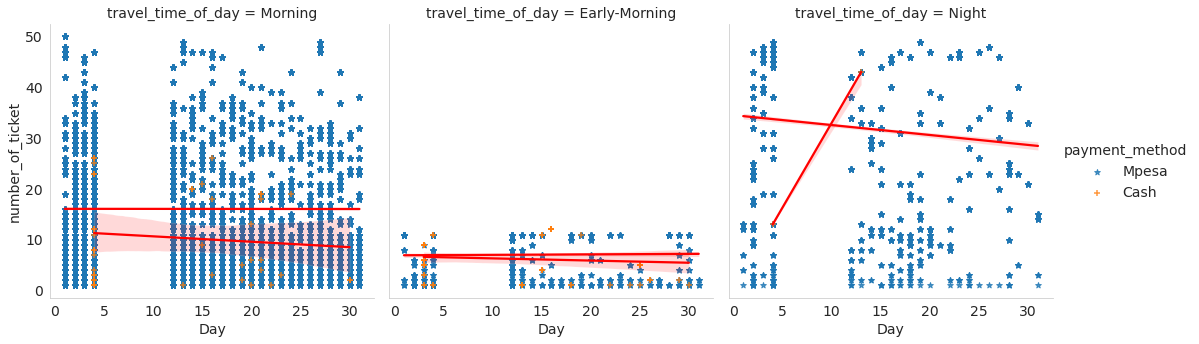

In [62]:
# Chart - 12 visualization code
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(x='Day',
           y='number_of_ticket',
           data=df,
           col="travel_time_of_day",
           hue="payment_method",
           markers =['*','+'],
           col_wrap=3,
           line_kws={'color': 'red'})
plt.show()

##### 1. Why did you pick the specific chart?

Lmplot is used to draw a scatter plot onto a FacetGrid. So to get the face of the content rating we used this and took Sentiments into the data points.Lmplot can visualize linear relationships among subsets of a larger data structure
 



##### 2. What is/are the insight(s) found from the chart?

* People does not travel from 5th to 12th day in Nairobi.
* Mpesa is used most preper type of payment
* Mpesa is only used in the Night time in Kenya for payment.
* Few people travel early morning. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

There is posssible of providing the alternative of Mpesa because most of them uses that only.

People does not travel from 5th day to 12th day in Nairobi so this saves lots of cost. Govenment can announce that market and road would have less number of occupancies. 

#### Chart - 13 Relation b/w Subset of Time of travel and Vehicle Type

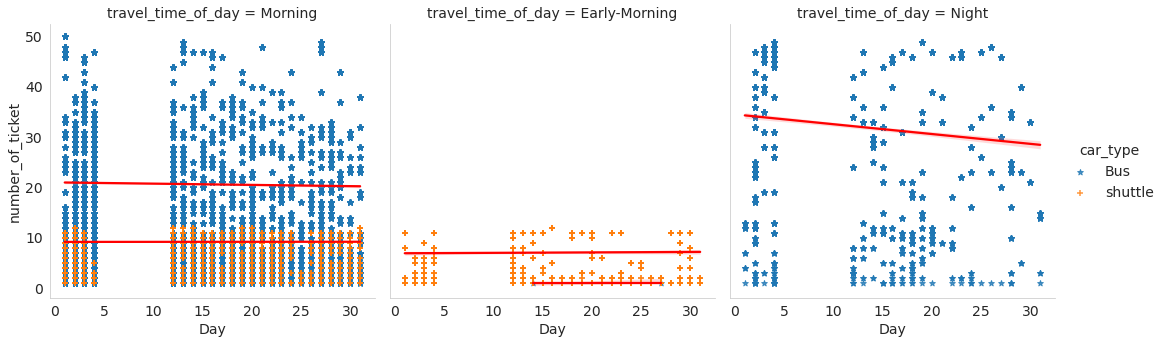

In [63]:
# Chart - 13 visualization code
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(x='Day',
           y='number_of_ticket',
           data=df,
           col="travel_time_of_day",
           hue="car_type",
           markers =['*','+'],
           col_wrap=3,
           line_kws={'color': 'red'})
plt.show()

##### 1. Why did you pick the specific chart?

Lmplot is used to draw a scatter plot onto a FacetGrid. So to get the face of the content rating we used this and took Sentiments into the data points.Lmplot can visualize linear relationships among subsets of a larger data structure
 



##### 2. What is/are the insight(s) found from the chart?

Insight:
* Shuttle is only the means of travelling in the morning.
* Bus is only the way of travelling in the Night.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

No need to open the counter of bus and shuttle 24 hour instead in morning only shuttle counter can be opened and night only bus counter can be opened for the ticket booking or they can book through the Mpesa App.

#### Chart 14 Relationship B/W Months and Travel Time 

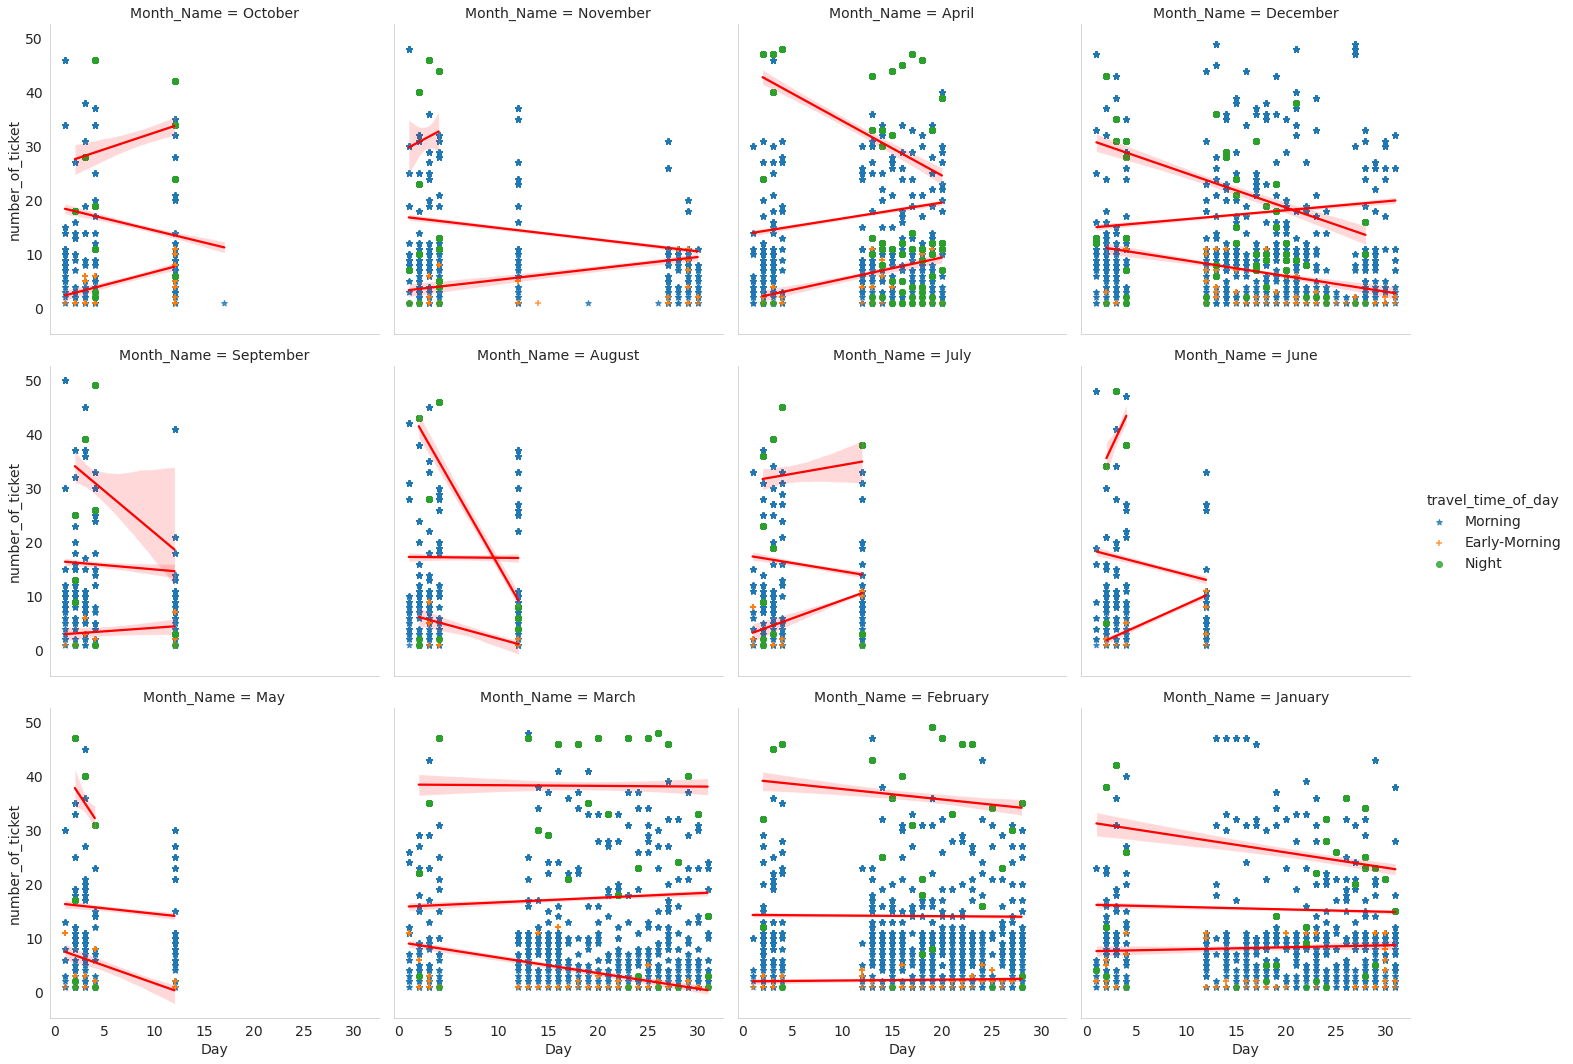

In [64]:
# Chart - 13 visualization code

sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(x='Day',
           y='number_of_ticket',
           data=df,
           col="Month_Name",
           hue="travel_time_of_day",
           markers =['*','+','o'],
           col_wrap=4,
           line_kws={'color': 'red'})
plt.show()

##### 1. Why did you pick the specific chart?

Lmplot is used to draw a scatter plot onto a FacetGrid. So to get the face of the content rating we used this and took Sentiments into the data points.Lmplot can visualize linear relationships among subsets of a larger data structure
 



##### 2. What is/are the insight(s) found from the chart?

Insight:
* Vechile is not available every day of every month.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This show that people in Kenya does not travel evey day of every month. There is lack of Vehicle in Kenya. Govenment should provide Incentive for the vehicle. So there will be more busses and shuttle in the road.The bus network can expand and people will get vehicele to travel.

#### Chart 15 Percentage of Traveller in Different Season

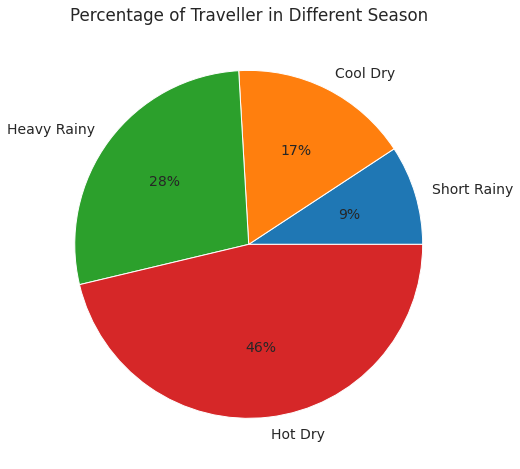

In [65]:
# Chart - 15 visualization code
plt.figure(figsize = (8,8))
plt.pie(travel_per_season['Total Traveller'],labels = travel_per_season['Season'],autopct='%.0f%%')
plt.title("Percentage of Traveller in Different Season")
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is a graphical representation technique that displays data in a circular-shaped graph. It is a composite static chart that works best with few variables. Pie charts are often used to represent sample data—with data points belonging to a combination of different categories. Each of these categories is represented as a “slice of the pie.” The size of each slice is directly proportional to the number of data points that belong to a particular category

##### 2. What is/are the insight(s) found from the chart?

Insights:
* People love to travel to Nairobi in Hot Dry Season.
* People does not love to travel in short Raining season.
* People prefer to travel in Dry season than Raining Season

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It shows there is likely to have more traffic in the dry season as more number of people travell to Nairobi.

#### Chart 16

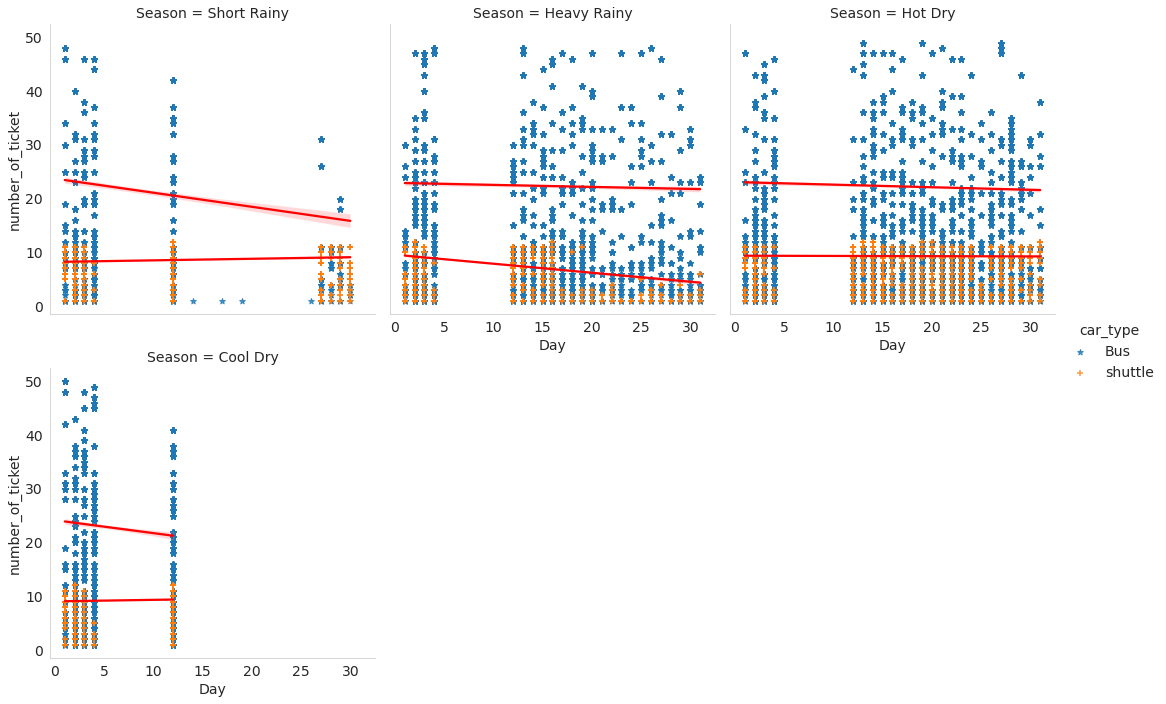

In [66]:
# Chart - 12 visualization code
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(x='Day',
           y='number_of_ticket',
           data=df,
           col="Season",
           hue="car_type",
           markers =['*','+'],
           col_wrap=3,
           line_kws={'color': 'red'})
plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

* Insight:
  * Bus is the main vehicle for travelling but Shutter is used more in Short Rainy Season
  * The use of shutter in Heavy Rain is inversely proportion to the Number of Days.
  * The Bus is inversely proportional to the number of days in the months in Short Rainy Season otherwise it has constant relationship.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Government of Nairobi need to find the reason why people dont travel more in cool dry season and short rainy season. They need to make some policies to make them travel more in those seasons also.

#### Chart - 14 - Correlation Heatmap

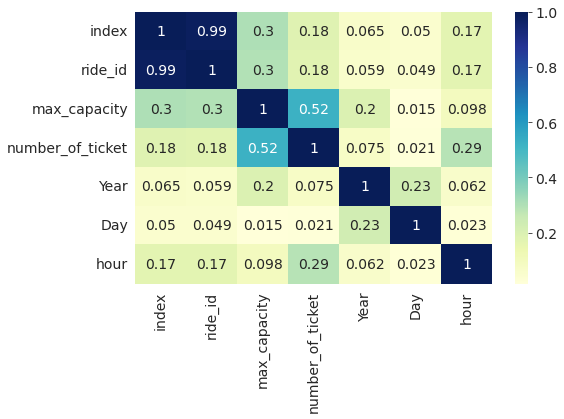

In [67]:
# Correlation Heatmap visualization code
# plotting correlation heatmap
plt.figure(figsize=(8,5))
correlation = df.corr()
dataplot = sns.heatmap(abs(correlation),cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmaps are that kind of plot which visualize the strength of relationships between different numerical variables. Correlation plots are often used to understand which variables are related to each other. These are mostly used so that it can find the potential relationships between variables. The depth of colour-coding of the cells makes it easier to identify how strong the relationship is between them. It is used to find linear and non-linear relationships.

##### 2. What is/are the insight(s) found from the chart?

* Insight:
  * index and ride_id have correlation of 0.99
  * max_capacity and number of ticket are highly corelated with each other i.e 0.52

#### Chart - 15 - Pair Plot 

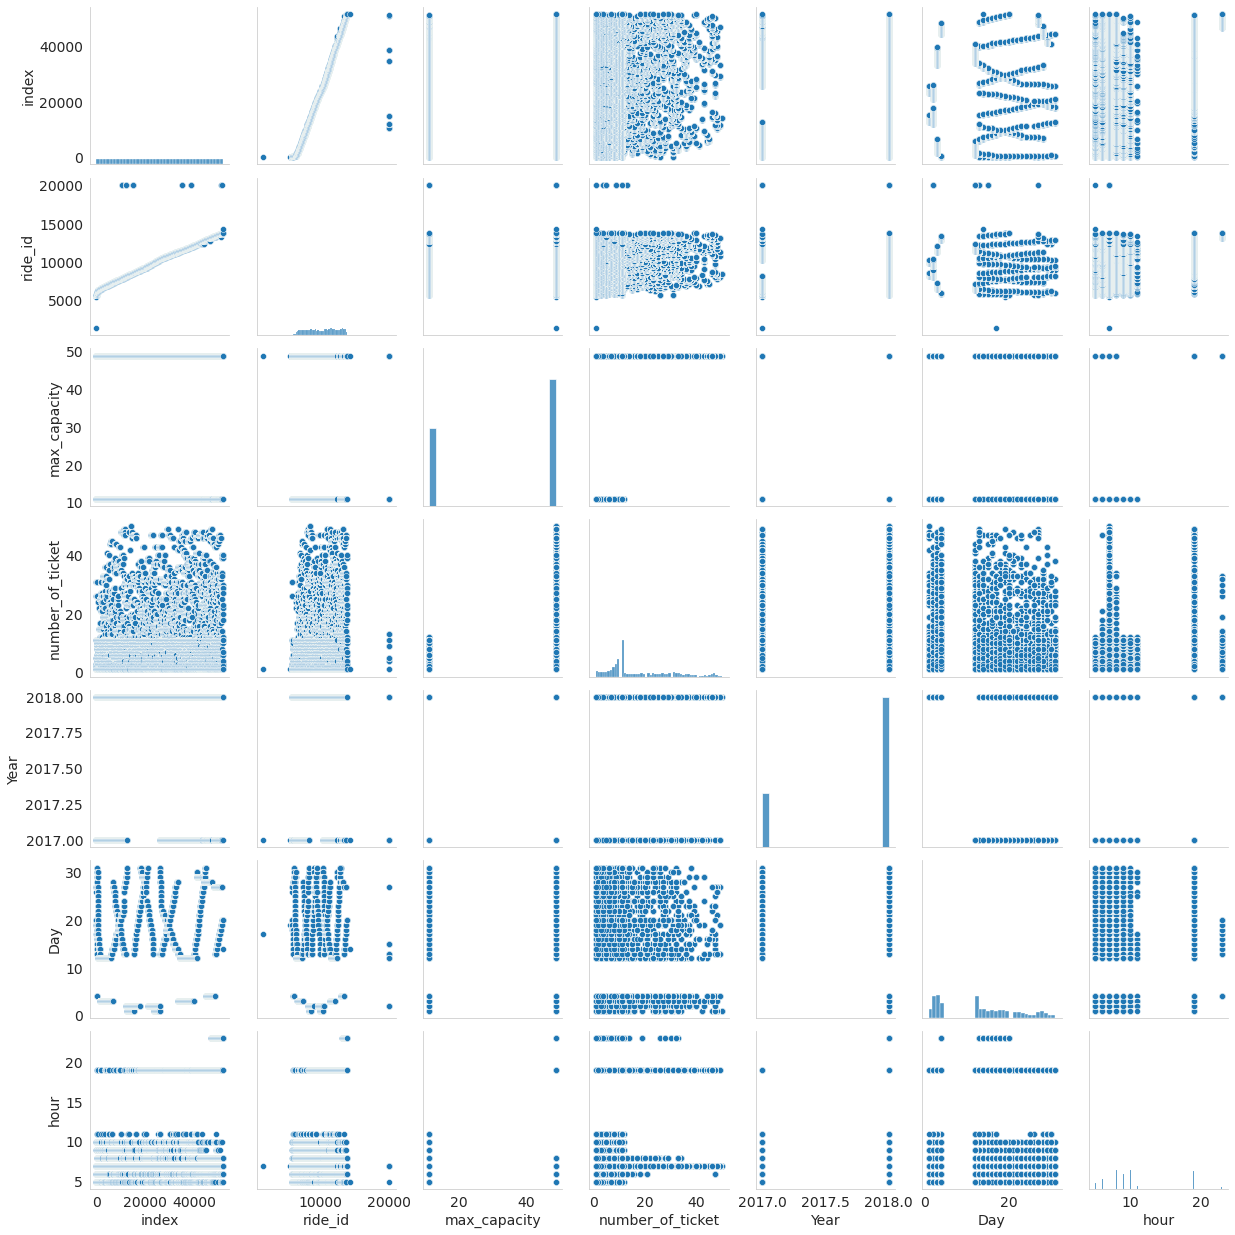

In [68]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Pair plot allows us to plot pairwise relationships between variables within a dataset and it also creates a nice visualization and helps us understand the data by summarizing a large amount of data in a single figure. This is essential for exploring our dataset and trying to become familiar with it. So it will produce figures of all the variables present in the dataset along with the y and x axis. And diagonal shows the histogram showing the distribution of each of the variables.

##### 2. What is/are the insight(s) found from the chart?

The above charts show that almost every variable have a slightly linear relationship between each other and their data points and their data point are not linearly separable except for the max capacity and number of ticket.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

70 % of the people traveller in the dry season. 

#### 2. Perform an appropriate statistical test.

In [69]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

There are no buses for 15 days.

#### 2. Perform an appropriate statistical test.

In [70]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [71]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [72]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [73]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [74]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [75]:
# Expand Contraction

#### 2. Lower Casing

In [76]:
# Lower Casing

#### 3. Removing Punctuations

In [77]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [78]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [79]:
# Remove Stopwords

In [80]:
# Remove White spaces

#### 6. Rephrase Text

In [81]:
# Rephrase Text

#### 7. Tokenization

In [82]:
# Tokenization

#### 8. Text Normalization

In [83]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [84]:
# POS Taging

#### 10. Text Vectorization

In [85]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [86]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [87]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [88]:
# Transform Your data

### 6. Data Scaling

In [89]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [90]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [91]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [92]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [93]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [94]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [96]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [97]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [98]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [99]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [100]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [101]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [102]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***